In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitness-tracker-dataset/gym_members_exercise_tracking_synthetic_data.csv


### Task 1
 **Load the Data**-• Import the necessary libraries (pandas, numpy, matplotlib, seaborn).-
• Load the dataset into a pandas DataFrame using pd.read_csv() or from the provided file-
• Display the first few rows using .head() to understand the structure.

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/kaggle/input/fitness-tracker-dataset/gym_members_exercise_tracking_synthetic_data.csv")
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83


In [81]:
df.shape

(1800, 15)

In [82]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [83]:
df.info

<bound method DataFrame.info of        Age  Gender  Weight (kg)  Height (m) Max_BPM  Avg_BPM  Resting_BPM  \
0     34.0  Female         86.7        1.86     174    152.0         74.0   
1     26.0  Female         84.7        1.83     166    156.0         73.0   
2     22.0    Male         64.8        1.85     187    166.0         64.0   
3     54.0  Female         75.3        1.82     187    169.0         58.0   
4     34.0  Female         52.8        1.74     177    169.0         66.0   
...    ...     ...          ...         ...     ...      ...          ...   
1795  54.0    Male         88.5        2.00     173    134.0         58.0   
1796  52.0    Male         84.3        1.69     164    169.0         54.0   
1797  47.0    Male         70.1        1.84     188    129.0         67.0   
1798  35.0    Male         49.3        1.71     180    152.0         73.0   
1799  40.0    Male         79.5        1.92     184    156.0         52.0   

      Session_Duration (hours)  Calories_Bu

In [84]:
df.describe()

,Age,Weight (kg),Height (m),Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,1790.000000,1778.000000,1774.000000,1770.000000,1781.000000,1777.000000,1777.000000,1784.000000,1776.000000,1742.000000,1743.000000,1770.000000
mean,34.475419,67.606637,1.739233,146.259322,63.951151,1.391598,1033.698931,23.509361,2.706644,3.339265,1.823867,19.957774
std,12.315728,19.861408,0.123892,15.219516,7.936502,0.372342,328.049662,5.865557,0.710224,0.947955,0.746568,6.573175
min,18.000000,40.000000,1.500000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,23.000000,52.300000,1.650000,133.250000,57.000000,1.130000,794.000000,20.500000,2.100000,3.000000,1.000000,14.780000
50%,33.000000,65.300000,1.730000,146.000000,65.000000,1.370000,1030.000000,24.300000,2.800000,3.000000,2.000000,18.690000
75%,45.000000,80.100000,1.820000,160.000000,72.000000,1.640000,1249.000000,27.500000,3.400000,4.000000,2.000000,23.517500
max,59.000000,129.900000,2.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


### **Step 3: Identify and Handle Missing Values**
1. Use .isnull().sum() to check the number of missing values per column.
2. Visualize missing data using a heatmap (sns.heatmap) to identify patterns.
3. Handle missing values:
o Age, Weight (kg), Height (m), and Numeric Columns:
 Impute missing values using the mean or median.
o Gender and Workout_Type:
 Impute missing values using the mode (most frequent value).
o Document and justify your imputation strategy

In [85]:
df.isnull().sum()

Age                              10
Gender                           71
Weight (kg)                      22
Height (m)                       26
Max_BPM                          21
Avg_BPM                          30
Resting_BPM                      19
Session_Duration (hours)         23
Calories_Burned                  23
Workout_Type                     61
Fat_Percentage                   16
Water_Intake (liters)            24
Workout_Frequency (days/week)    58
Experience_Level                 57
BMI                              30
dtype: int64

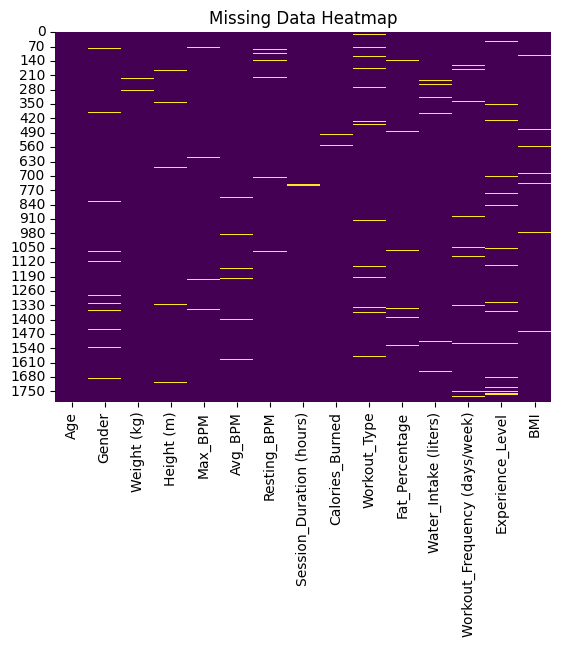

In [86]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [87]:
for col in ['Age', 'Weight (kg)', 'Height (m)']: 
    df[col].fillna(df[col].mean())
for col in ['Gender', 'Workout_Type']: 
    df[col].fillna(df[col].mode()[0])
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,54.0,Male,88.5,2.00,173,134.0,58.0,1.11,1388.0,HIIT,27.7,3.7,3.0,2.0,36.73
1796,52.0,Male,84.3,1.69,164,169.0,54.0,0.77,1367.0,HIIT,32.6,2.9,3.0,2.0,15.11
1797,47.0,Male,70.1,1.84,188,129.0,67.0,1.20,1261.0,Strength,28.4,2.5,3.0,2.0,17.99
1798,35.0,Male,49.3,1.71,180,152.0,73.0,1.04,956.0,Cardio,32.9,1.7,4.0,3.0,12.65


In [88]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [89]:
df['Max_BPM'] = pd.to_numeric(df['Max_BPM'], errors='coerce')

In [90]:
df.Gender.unique()

array(['Female', 'Male', nan], dtype=object)

In [91]:
df.Workout_Type.unique()

array(['Strength', 'Cardio', 'HIIT', 'Yoga', nan, '\\nStrength',
       '\\tCardio', '\\tYoga'], dtype=object)

In [92]:
df['Gender'] = df['Gender'].replace({'M': 'Male', 'F': 'Female'})

In [93]:
df.Gender

0       Female
1       Female
2         Male
3       Female
4       Female
         ...  
1795      Male
1796      Male
1797      Male
1798      Male
1799      Male
Name: Gender, Length: 1800, dtype: object

In [94]:
df['BMI'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)
df['Workout_Intensity'] = df['Avg_BPM'] / df['Max_BPM']

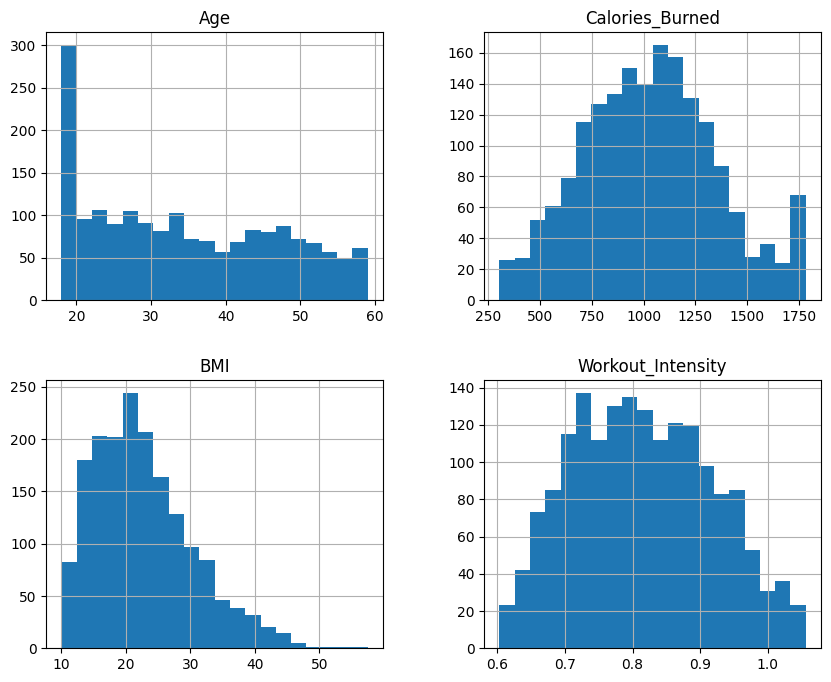

In [95]:
numeric_cols = ['Age', 'Calories_Burned', 'BMI', 'Workout_Intensity']
df[numeric_cols].hist(bins=20, figsize=(10, 8))
plt.show()

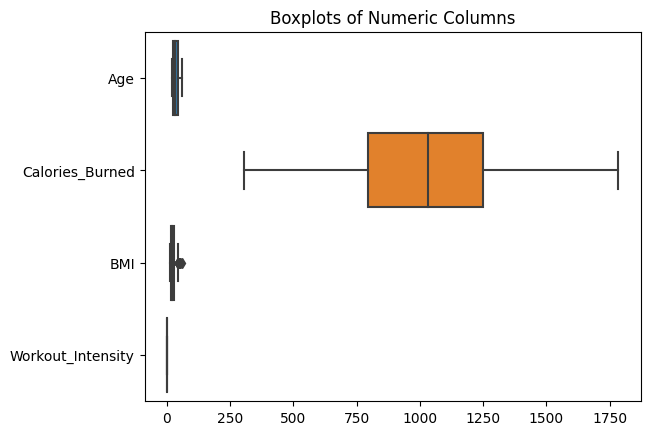

In [96]:
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title("Boxplots of Numeric Columns")
plt.show()

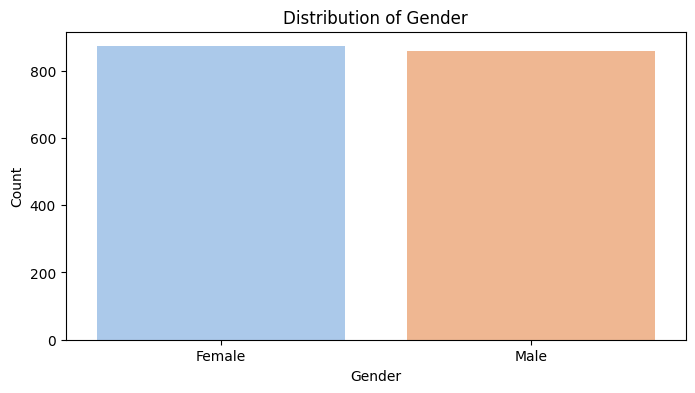

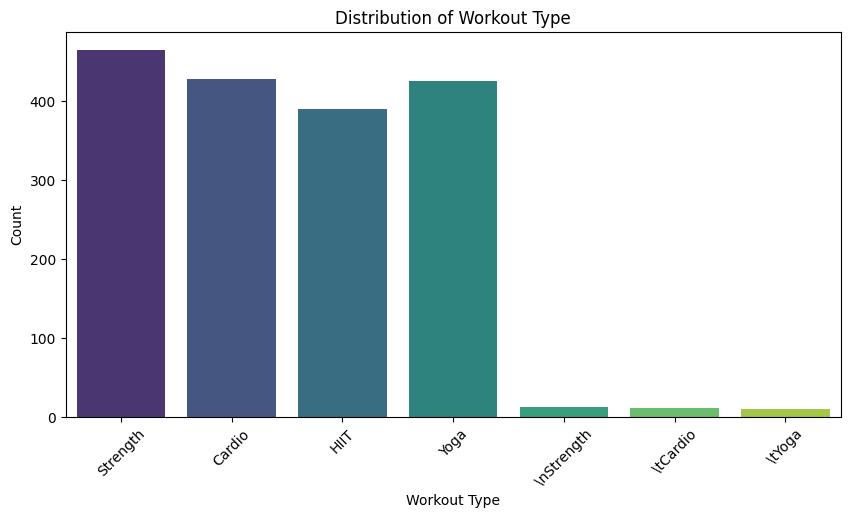

In [97]:

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Workout_Type', palette='viridis')
plt.title('Distribution of Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()


In [98]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

Correlation Matrix:
                           Calories_Burned  Session_Duration (hours)
Calories_Burned                  1.000000                  0.020149
Session_Duration (hours)         0.020149                  1.000000


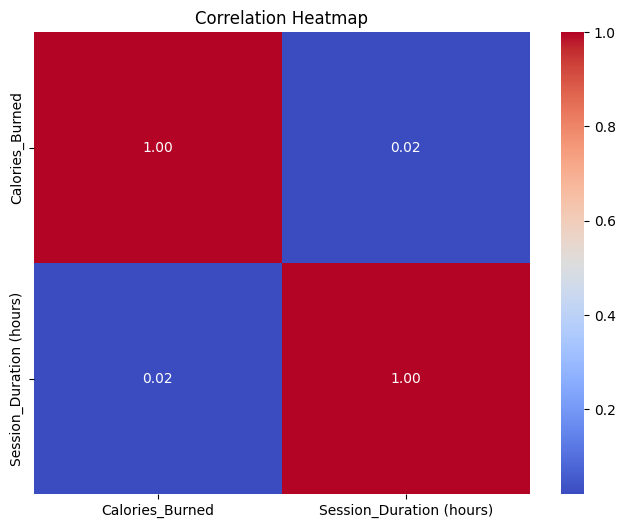

In [99]:
numeric_cols = ['Calories_Burned', 'Session_Duration (hours)']
numeric_df = df[numeric_cols]

correlation_matrix = numeric_df.corr()

print("Correlation Matrix:\n", correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

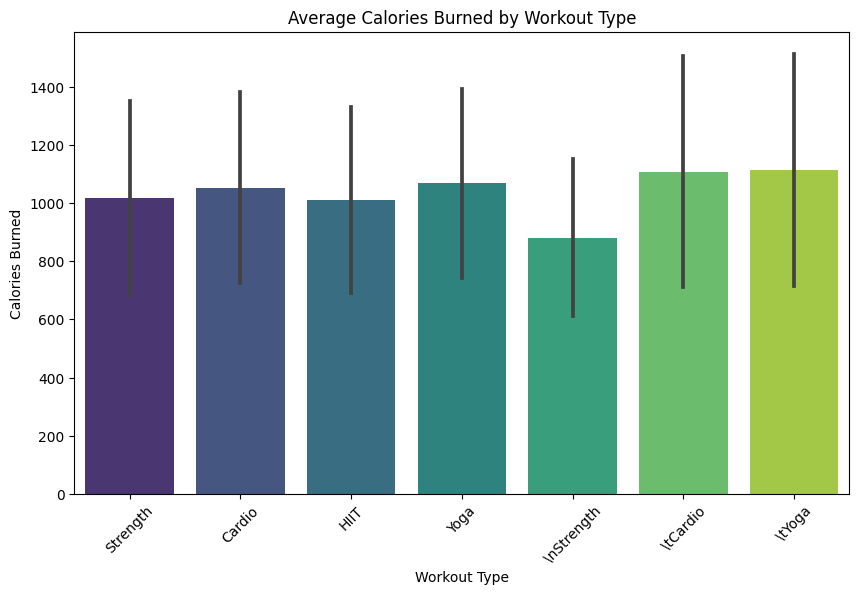

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Workout_Type', y='Calories_Burned', data=df, estimator=np.mean, errorbar='sd', palette='viridis')
plt.title("Average Calories Burned by Workout Type")
plt.xlabel("Workout Type")
plt.ylabel("Calories Burned")
plt.xticks(rotation=45)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

KeyError: 'Workout_Frequency'

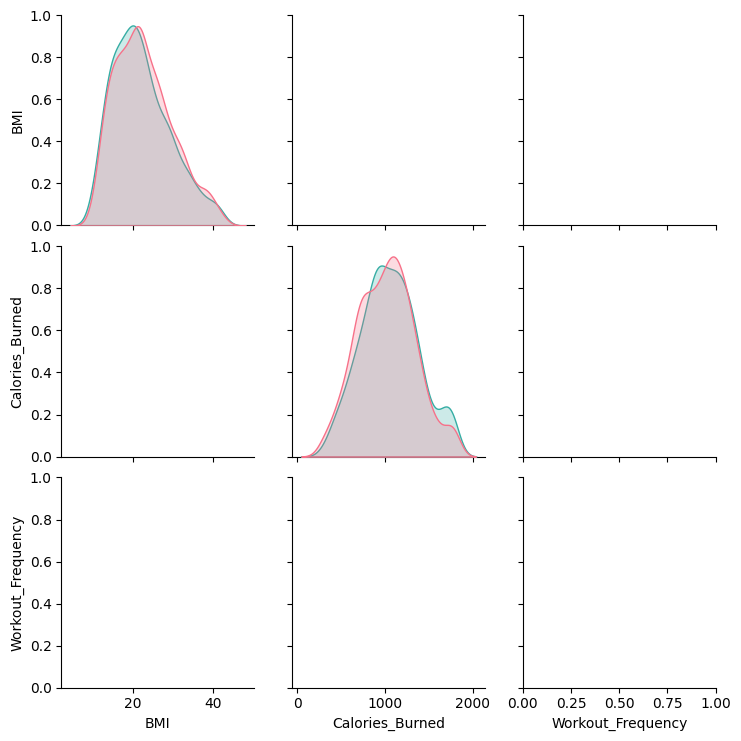

In [101]:
sns.pairplot(df, vars=['BMI', 'Calories_Burned', 'Workout_Frequency'], hue='Gender', palette='husl', diag_kind='kde')
plt.suptitle("Pair Plot of BMI, Calories Burned, and Workout Frequency", y=1.02)
plt.show()


In [ ]:
df = pd.get_dummies(df, columns=['Gender', 'Workout_Type'], drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
# BMI Distribution across Workout Frequency
plt.figure(figsize=(10, 6))
sns.boxplot(x='Workout_Frequency', y='BMI', data=df, palette='pastel')
plt.title("BMI Distribution Across Workout Frequency")
plt.xlabel("Workout Frequency (sessions per week)")
plt.ylabel("BMI")
plt.show()
